# Split a Table into Groups

The _groupby_ function is one of the most powerful and useful functions for dataframes in Pandas. The main flow of the _groupby_ function is as follows:
- **split** a large dataframe table into groups based on some values or categories in some of the columns, and then 
- **apply** some aggregation or other function on each group, and then 
- **combine** them back together into a single table. 

[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/aiola-lab/from-excel-to-pandas/blob/master/notebooks/03.02_group_by.ipynb)

In [1]:
import pandas as pd

## Loading data

We will now start with another data from API from an open source [brewery-DB API](https://www.openbrewerydb.org/). We can analyze it to answer questions regarding states or other groups in the data.

In [2]:
open_brewery_api_url = 'https://api.openbrewerydb.org/breweries?per_page=50'

import requests
response = requests.get(open_brewery_api_url)
response

<Response [200]>

In [3]:
brewery_list = (
    pd
    .json_normalize(
        response
        .json()
    )
)

brewery_list.head(5)

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,None,None,Knox,Indiana,None,46534,United States,-86.627954,41.289715,6308165790,None,2021-10-23T02:24:55.243Z,2021-10-23T02:24:55.243Z
1,10-barrel-brewing-co-bend-1,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,None,97701-9847,United States,None,None,5415851007,http://www.10barrel.com,2021-10-23T02:24:55.243Z,2021-10-23T02:24:55.243Z
2,10-barrel-brewing-co-bend-2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,None,97703-2465,United States,None,None,5415851007,None,2021-10-23T02:24:55.243Z,2021-10-23T02:24:55.243Z
3,10-barrel-brewing-co-bend-pub-bend,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,None,None,Bend,Oregon,None,97701,United States,-121.2809536,44.0912109,5415851007,None,2021-10-23T02:24:55.243Z,2021-10-23T02:24:55.243Z
4,10-barrel-brewing-co-boise-boise,10 Barrel Brewing Co - Boise,large,826 W Bannock St,None,None,Boise,Idaho,None,83702-5857,United States,-116.202929,43.618516,2083445870,http://www.10barrel.com,2021-10-23T02:24:55.243Z,2021-10-23T02:24:55.243Z


## Loading all pages

If the number of results from an API is high, the API often uses pagination and returns a constant number of results in each page. 
* Start with an empty list of values
* For each page between page 1 and page 150:
* Read the data from the API with the page number
* Add the data to the growing list
* Finally, create a dataframe with the above whole list of breweries  

In [4]:
api_dataset = [] 

#looping through and putting data to the list api_dataset
for page in range (1, 150):
    response = requests.get(open_brewery_api_url + f"&page={page}").json()
    api_dataset.extend(response)

breweries_data = pd.json_normalize(api_dataset)

### Saving the dataset

We can save the dataset for later usage. We can save it in Excel format or CSV.

In [5]:
breweries_data.to_csv('../data/us_breweries.csv', index=False)

## Counting Values

The simplest aggregation function for each group is the _size_. How many breweries do we have in each state?
* Start with the brewery table above
* Group the rows by _state_
* Count the size of each group

In [6]:
(
    breweries_data
    .groupby('state')
    .size()
)

state
Alabama                  44
Alaska                   51
Arizona                 116
Arkansas                 43
Bouche du Rhône           2
California              855
Colorado                391
Connecticut              86
Delaware                 26
District of Columbia     16
Florida                 290
Georgia                  96
Hawaii                   21
Idaho                    57
Illinois                232
Indiana                 148
Iowa                     83
Kansas                   40
Kentucky                 53
Louisiana                40
MIssouri                  1
Maine                   109
Maryland                105
Massachusetts           152
Michigan                355
Minnesota               161
Mississippi              15
Missouri                128
Montana                  87
Nebraska                 53
Nevada                   47
New Hampshire            69
New Jersey              110
New Mexico               82
New York                384
North Carolina

## Sorting Values

To sort the values is also simple with _sort_value()_ function
* Start with the brewery table above
* Group the rows by _state_
* Count the size of each group
* Sort the list of states and and the count of the breweries in descending order

In [7]:
(
    breweries_data
    .groupby('state')
    .size()
    .sort_values(ascending=False)
)

state
California              855
Washington              437
Colorado                391
New York                384
Michigan                355
Pennsylvania            317
Texas                   315
Florida                 290
Ohio                    279
North Carolina          277
Oregon                  264
Virginia                237
Illinois                232
Wisconsin               199
Minnesota               161
Massachusetts           152
Indiana                 148
Missouri                128
Arizona                 116
New Jersey              110
Maine                   109
Maryland                105
Tennessee               102
Georgia                  96
Montana                  87
Connecticut              86
Iowa                     83
New Mexico               82
South Carolina           69
New Hampshire            69
Idaho                    57
Vermont                  54
Kentucky                 53
Nebraska                 53
Alaska                   51
Nevada        

## Visualization of the data

Let's do a simple visualization of the data without any map, just using the longitude and latitude values of each brewery. 
* Start with the brewery table above
* Convert the longitude and latitude to be numeric values 
* Plot the results
* as hexbin with longitude and latitudes as the coordinates 


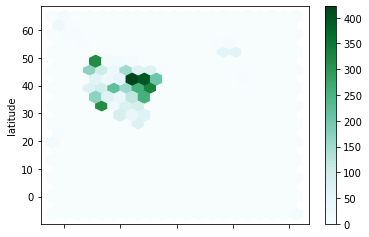

In [8]:
(
    breweries_data
    .assign(longitude = lambda x : pd.to_numeric(x.longitude))
    .assign(latitude = lambda x : pd.to_numeric(x.latitude))
    .plot
    .hexbin(
        x='longitude', 
        y='latitude', 
        gridsize=20
    )
);

The graph above looks like the map of the US and the distribution of breweries in geographic terms. We can see the deep green in NY area which we already know that is third on the list of states (after the huge California and Colorado), but also see an even deeper blue area around Illinois. We will dive deeper into these questions, when we merge the zip code level with the data, and find the where should you live or visit if you want to taste as many breweries as possible. 

## More advanced Aggregation Functions

Our data set doesn't have many numeric field, and we should load a different data set to examine the more advanced aggregation options of _groupby_. We will use one of the famouse data sets used for learning to build machine learning models. The last column _annual_income_ has only two values _<=50K_ and _>50K_, and we want to try and predict based on the other parameters such as age, gender, years of education, etc. in which bucket each person lands. 

* Define the column names for the data
* Read the CSV format of the data from the dataset URL
* Set the names of the columns as defined above

In [9]:
adult_names = ['age','workclass','id','education','education_num','marital_status',
                'occupation', 'relationship','race','gender','capital_gain',
              'capital_loss','hours_per_week','native_country','annual_income']
adults_data = (
  pd
  .read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
    names = adult_names
  )
)
adults_data

,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Calclulating mean

First we can calculate the average age in each income group, and see if there is any difference.
* Start with the adults data that was loaded above
* Group using the _annual\_income_ value
* Take only the _age_ value
* Calculate the average of each group

In [10]:
(
    adults_data
    .groupby('annual_income')
    ['age']
    .mean()
)

annual_income
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64

We can see that the average age of people who earned more than 50K is over 44, while the average age of the lower income (less than 50K) is younger and around 36 years

## Group by multiple keys

Let's see if women earn less than men, and we will do that by grouping both by the income group (_annual_income_) and the gender column.

* Start with the adults data that was loaded above
* Group using the _annual\_income_ and the _gender_ values 
* Calculate the size of each group

In [11]:
(
    adults_data
    .groupby(['annual_income','gender'])
    .size()
)

annual_income  gender 
 <=50K          Female     9592
                Male      15128
 >50K           Female     1179
                Male       6662
dtype: int64

It is hard to calculate the percentage and evaluate the difference from the size of each group. Let's calculate the percentage and also format the out to make it easier to read the results.

* Start with the adults data that was loaded above
* Group using the _annual\_income_ and _gender_ values
* Take only the _id_ value
* Calculate the size of each group
* Group again by the first level (_annual\_income_)
* For each row in each group calculate the ratio of the size of the row with the total size of the group
* Apply style to the results
* Format the results as percentage with two digit precision. 

In [12]:
(
    adults_data
    .groupby(['annual_income','gender'])
    [['id']]
    .count()
    .groupby(level=0)
    .apply(lambda x: x / float(x.sum()))
    .style
    .format('{:.2%}')
)

We can now easily see that the percentage of women with higher income is less than half that of the lower income. Hopefully, the current data (this data is extracted from the 1994 Census database) has improved the gender equlity in this aspect.

## Advanced Group Functions

We saw before how to apply a function on each row in a dataframe table, but many times we want to apply a function on a group of rows based on a value of a column or a couple of columns.

We can also take each of the groups and calculate more advanced functions such as Correlation. Let's see if we find Correlation with in each group between years of education and the number of work per week (which shows some quality of hard work)

* Start with the adults data that was loaded above
* Take the _annual\_income_ and _gender_ values with the _education\_num_ and _hours\_per\_week_ values
* Group by the _annual\_income_ and _gender_ (and calculate the average of the other values in each group)
* Calculate the Correlation of the values in each group
* Replace the self-Correlation values of 1 with 0 
* Apply style to the results
* Format the results with three digit precision. 
* Color the background of the cells according to the correlation values

In [13]:
(
    adults_data
    [['annual_income','gender','education_num','hours_per_week']]
    .groupby(['annual_income','gender'])
    .corr()
    .replace(1,0)
    .style
    .format('{:.3}')
    .background_gradient(cmap='coolwarm')
)

We can see that within each group the correlation of "hard work", as we defined it before, is higher for the female (0.151 and 0.187) than the male (0.069 and 0.0477). 